In [19]:
!pip install tabulate

In [29]:
import json
import pandas as pd
from collections import defaultdict

with open("chexpert-vit-model/checkpoint-80944/trainer_state.json") as f:
    data = json.load(f)

# Group entries by epoch
epoch_data = defaultdict(dict)
for entry in data["log_history"]:
    epoch = entry.get("epoch")
    if epoch is None:
        continue
    
    if "loss" in entry:
        epoch_data[epoch]["Train Loss"] = entry["loss"]
    if "eval_loss" in entry:
        epoch_data[epoch]["Eval Loss"] = entry["eval_loss"]
    if "eval_accuracy" in entry:
        epoch_data[epoch]["Accuracy"] = entry["eval_accuracy"]
    if "eval_f1_score" in entry:
        epoch_data[epoch]["F1 Score"] = entry["eval_f1_score"]
    if "eval_precision" in entry:
        epoch_data[epoch]["Precision"] = entry["eval_precision"]
    if "eval_recall" in entry:
        epoch_data[epoch]["Recall"] = entry["eval_recall"]
    if "eval_auc" in entry:
        epoch_data[epoch]["AUC"] = entry["eval_auc"]

# Convert to DataFrame
df = pd.DataFrame.from_dict(epoch_data, orient='index')
df.index.name = 'Epoch'
df = df.sort_index().reset_index()
df['Epoch'] = df['Epoch'].astype(int).round(1)

# Format display
pd.set_option('display.float_format', '{:.4f}'.format)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')

print("Training Metrics:")
display(df)

# Optional: Save to CSV
df.to_csv('training_metrics.csv', index=False)

Training Metrics:


,Epoch,Train Loss,Eval Loss,Accuracy,F1 Score,Precision,Recall,AUC
0,1,0.4184,0.4091,0.3234,0.5321,0.7552,0.4639,0.8471
1,2,0.4111,0.4008,0.3332,0.5438,0.7791,0.4713,0.8574
2,3,0.4049,0.3940,0.3460,0.5611,0.7912,0.4941,0.8665
3,4,0.3973,0.3867,0.3571,0.6098,0.7750,0.5479,0.8760
4,5,0.3886,0.3755,0.3783,0.6316,0.7951,0.5656,0.8871
5,6,0.3756,0.3650,0.3846,0.6206,0.8462,0.5340,0.9003
6,7,0.3568,0.3433,0.4349,0.6998,0.8212,0.6495,0.9178
7,8,0.3369,0.3230,0.4691,0.7317,0.8557,0.6607,0.9334
8,9,0.3160,0.3065,0.5133,0.7786,0.8491,0.7270,0.9470
9,10,0.3123,0.2807,0.5662,0.8100,0.8930,0.7513,0.9611


In [ ]:
import json

with open("chexpert-vit-model/checkpoint-80944/trainer_state.json") as f:
    data = json.load(f)

for entry in data["log_history"]:
    if "loss" in entry:
        print(f"Epoch {entry['epoch']}: Training Loss = {entry['loss']}")
    if "eval_loss" in entry:
        print(f"Epoch {entry['epoch']}: Eval Loss = {entry['eval_loss']}")
    if "eval_accuracy" in entry:
        print(f"Epoch {entry['epoch']}: Eval Loss = {entry['eval_accuracy']}")
    if "eval_f1_score" in entry:
        print(f"Epoch {entry['epoch']}: Eval Loss = {entry['eval_f1_score']}")
    if "eval_precision" in entry:
        print(f"Epoch {entry['epoch']}: Eval Loss = {entry['eval_precision']}")
    if "eval_recall" in entry:
        print(f"Epoch {entry['epoch']}: Eval Loss = {entry['eval_recall']}")
    if "eval_auc" in entry:
        print(f"Epoch {entry['epoch']}: Eval Loss = {entry['eval_auc']}")


Epoch 1.0: Training Loss = 0.4184
Epoch 1.0: Eval Loss = 0.409057080745697
Epoch 1.0: Eval Loss = 0.3234234735170735
Epoch 1.0: Eval Loss = 0.5321372769317778
Epoch 1.0: Eval Loss = 0.7552360801217385
Epoch 1.0: Eval Loss = 0.46390360270600234
Epoch 1.0: Eval Loss = 0.8470653756034033
Epoch 2.0: Training Loss = 0.4111
Epoch 2.0: Eval Loss = 0.40078455209732056
Epoch 2.0: Eval Loss = 0.33316652147857084
Epoch 2.0: Eval Loss = 0.5438029783463599
Epoch 2.0: Eval Loss = 0.7791386972557172
Epoch 2.0: Eval Loss = 0.4713168379585286
Epoch 2.0: Eval Loss = 0.8573763023842916
Epoch 3.0: Training Loss = 0.4049
Epoch 3.0: Eval Loss = 0.3940262794494629
Epoch 3.0: Eval Loss = 0.3460233907289678
Epoch 3.0: Eval Loss = 0.56112215510804
Epoch 3.0: Eval Loss = 0.7911842402378603
Epoch 3.0: Eval Loss = 0.49408653802184554
Epoch 3.0: Eval Loss = 0.8664686188796483
Epoch 4.0: Training Loss = 0.3973
Epoch 4.0: Eval Loss = 0.3866672217845917
Epoch 4.0: Eval Loss = 0.3571380028296233
Epoch 4.0: Eval Loss = 

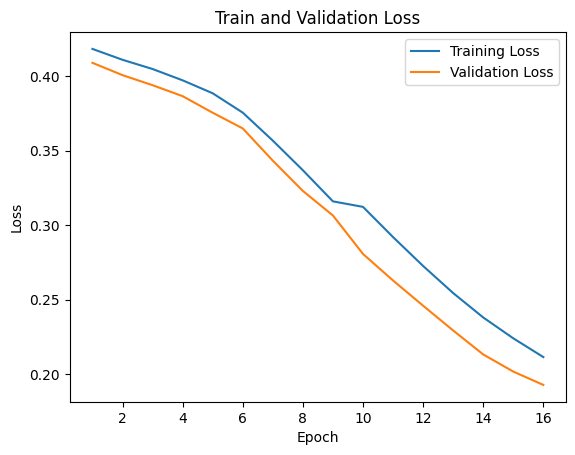

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

logs = pd.DataFrame(data["log_history"])
train_logs = logs.dropna(subset=["loss"])
eval_logs = logs.dropna(subset=["eval_loss"])

plt.plot(train_logs["epoch"], train_logs["loss"], label="Training Loss")
plt.plot(eval_logs["epoch"], eval_logs["eval_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Train and Validation Loss")
plt.legend()
plt.show()

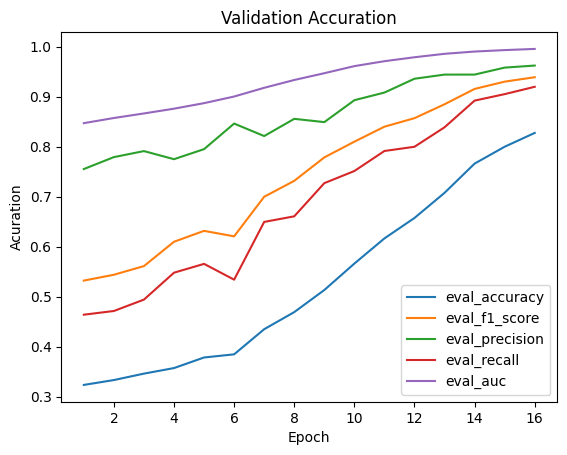

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

logs = pd.DataFrame(data["log_history"])
eval_accuracy = logs.dropna(subset=["eval_accuracy"])
eval_f1_score = logs.dropna(subset=["eval_f1_score"])
eval_precision = logs.dropna(subset=["eval_precision"])
eval_recall = logs.dropna(subset=["eval_recall"])
eval_auc = logs.dropna(subset=["eval_auc"])



plt.plot(eval_accuracy["epoch"], eval_accuracy["eval_accuracy"], label="eval_accuracy")
plt.plot(eval_f1_score["epoch"], eval_f1_score["eval_f1_score"], label="eval_f1_score")
plt.plot(eval_precision["epoch"], eval_precision["eval_precision"], label="eval_precision")
plt.plot(eval_recall["epoch"], eval_recall["eval_recall"], label="eval_recall")
plt.plot(eval_auc["epoch"], eval_auc["eval_auc"], label="eval_auc")
plt.xlabel("Epoch")
plt.ylabel("Acuration")
plt.title("Validation Accuration")
plt.legend()
plt.show()

# anjay

In [1]:
import os
import json
import pandas as pd
from datetime import datetime

# Direktori output training (berisi folder checkpoint-*)
output_dir = "chexpert-vit-model"

# Kolom yang ingin dipertahankan
target_columns = [
    "loss", "eval_loss", "eval_accuracy", 
    "eval_auc", "eval_f1_score", "eval_precision", "eval_recall"
]

In [2]:
# Dapatkan semua folder checkpoint dan urutkan berdasarkan modifikasi waktu (terlama -> terbaru)
checkpoint_dirs = [
    d for d in os.listdir(output_dir) 
    if d.startswith("checkpoint-")
]

# Urutkan berdasarkan waktu modifikasi folder
checkpoint_dirs.sort(key=lambda x: os.path.getmtime(os.path.join(output_dir, x)))

In [3]:
all_logs = []

for checkpoint in checkpoint_dirs:
    state_file = os.path.join(output_dir, checkpoint, "trainer_state.json")
    
    if os.path.exists(state_file):
        with open(state_file, "r") as f:
            data = json.load(f)
            log_history = data.get("log_history", [])
            
            # Ambil 2 entri terakhir (jika ada)
            last_two_logs = log_history[-2:] if len(log_history) >= 2 else log_history[-1:]
            
            for log in last_two_logs:
                # Filter kolom yang tidak diperlukan
                filtered_log = {k: v for k, v in log.items() if k in target_columns}
                filtered_log["checkpoint"] = checkpoint  # Tambahkan info checkpoint
                all_logs.append(filtered_log)

In [4]:
# Konversi ke DataFrame
df_logs = pd.DataFrame(all_logs)

# Tambahkan kolom 'epoch' berdasarkan urutan checkpoint
df_logs["epoch"] = df_logs.groupby("checkpoint").cumcount() + 1  # Epoch relatif per checkpoint

In [5]:
# Pisahkan log loss dan eval
df_loss = df_logs[df_logs["loss"].notna()][["checkpoint", "epoch", "loss"]]
df_eval = df_logs[df_logs["eval_loss"].notna()].drop(columns=["loss"])

# Gabungkan berdasarkan checkpoint dan epoch
df_merged = pd.merge(
    df_loss, 
    df_eval, 
    on=["checkpoint", "epoch"], 
    how="outer"
).sort_values(by=["checkpoint", "epoch"])

# Isi nilai NaN jika ada
df_merged.fillna(method="ffill", inplace=True)

/tmp/ipykernel_1243712/1082226615.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_merged.fillna(method="ffill", inplace=True)


In [6]:
# Hitung epoch global (akumulasi dari semua checkpoint)
df_merged["global_epoch"] = range(1, len(df_merged) + 1)

# Tampilkan hasil
print(df_merged[["global_epoch", "checkpoint", "loss", "eval_loss", "eval_accuracy"]].head())

   global_epoch         checkpoint    loss  eval_loss  eval_accuracy
0             1   checkpoint-10117  0.5025        NaN            NaN
1             2   checkpoint-10117  0.5025   0.472923       0.247981
2             3  checkpoint-101170  0.3975   0.472923       0.247981
3             4  checkpoint-101170  0.3975   0.393869       0.345078
4             5   checkpoint-10118  0.4111   0.393869       0.345078


In [10]:
df_merged

,checkpoint,epoch,loss,eval_accuracy,eval_auc,eval_f1_score,eval_loss,eval_precision,eval_recall,global_epoch
0,checkpoint-10117,1,0.5025,NaN,NaN,NaN,NaN,NaN,NaN,1
1,checkpoint-10117,2,0.5025,0.247981,0.749169,0.303141,0.472923,0.512330,0.269191,2
2,checkpoint-101170,1,0.3975,0.247981,0.749169,0.303141,0.472923,0.512330,0.269191,3
3,checkpoint-101170,2,0.3975,0.345078,0.865290,0.572788,0.393869,0.779127,0.504546,4
4,checkpoint-10118,1,0.4111,0.345078,0.865290,0.572788,0.393869,0.779127,0.504546,5
5,checkpoint-10118,2,0.4111,0.333167,0.857376,0.543803,0.400785,0.779139,0.471317,6
6,checkpoint-15177,1,0.4049,0.333167,0.857376,0.543803,0.400785,0.779139,0.471317,7
7,checkpoint-15177,2,0.4049,0.346023,0.866469,0.561122,0.394026,0.791184,0.494087,8
8,checkpoint-20234,1,0.4714,0.346023,0.866469,0.561122,0.394026,0.791184,0.494087,9
9,checkpoint-20234,2,0.4714,0.262154,0.770531,0.380966,0.460995,0.579082,0.347593,10


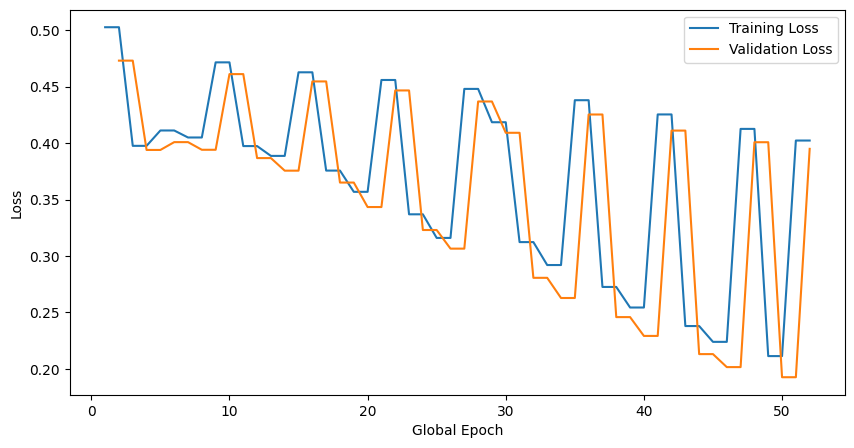

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df_merged["global_epoch"], df_merged["loss"], label="Training Loss")
plt.plot(df_merged["global_epoch"], df_merged["eval_loss"], label="Validation Loss")
plt.xlabel("Global Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()